In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('data3a.csv')

In [3]:
data['f_int'] = (data.f=='T').astype(int)

In [4]:
data['x^2'] = data.x**2
data['x^3'] = data.x**3
data['x^4'] = data.x**4
data['x^5'] = data.x**5
data['x^6'] = data.x**6

In [5]:
data.x_c = sm.add_constant(data[['x','x^2','x^3','x^4','x^5','x^6']])

In [6]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Mon, 30 Jan 2017   Deviance:                       79.387
Time:                        23:25:38   Pearson chi2:                     76.7
No. Iterations:                   100                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8185.6246   7764.788      1.054      0.292     -7033.079  2.34e+04
x          -4980.3818   4833.716     -1.030      0.303     -1.45e+04  4493.528
x^2         1251.8054   1245.520      1.005      0.315     -1189.369  3692.980
x^3         -166.4112    170.083     -0.978      0.328      -499.768   166.945
x^4           12.3450     12.985      0.951      0.342       -13.105    37.795
x^5           -0.4847      0.526     -0.922      0.356        -1.515     0.545
x^6            0.0079      0.009      0.893      0.372        -0.009     0.025
==============================================================================
"""

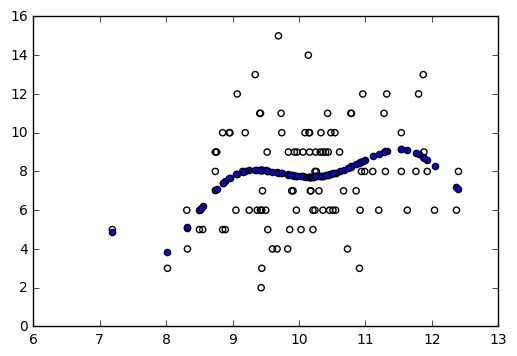

In [8]:
plt.scatter(data.x,data.y,facecolor='none')
plt.scatter(data.x,result.predict(data.x_c))

In [9]:
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Mon, 30 Jan 2017   Deviance:                       89.507
Time:                        23:28:40   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000         1.988     2.128
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


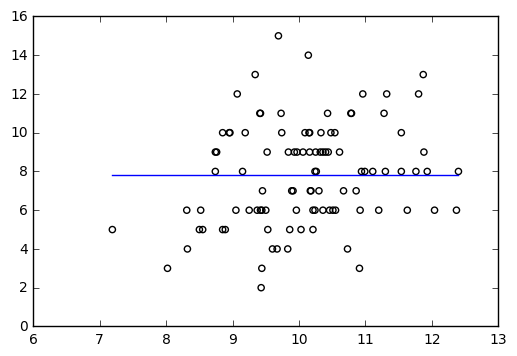

In [13]:
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(data.sort_index(by='x').x,result.predict())

In [14]:
data.head()

,y,x,f,f_int,x^2,x^3,x^4,x^5,x^6
0,6,8.31,C,0,69.0561,573.856191,4768.744947,39628.270511,3.293109e+05
1,6,9.44,C,0,89.1136,841.232384,7941.233705,74965.246175,7.076719e+05
2,6,9.50,C,0,90.2500,857.375000,8145.062500,77378.093750,7.350919e+05
3,12,9.07,C,0,82.2649,746.142643,6767.513772,61381.349912,5.567288e+05
4,10,10.16,C,0,103.2256,1048.772096,10655.524495,108260.128873,1.099923e+06


In [15]:
data.x_c = sm.add_constant(data.f_int)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Mon, 30 Jan 2017   Deviance:                       89.475
Time:                        23:32:17   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000         1.952     2.151
f_int          0.0128      0.071      0.179      0.858        -0.127     0.153
==============================================================================
"""

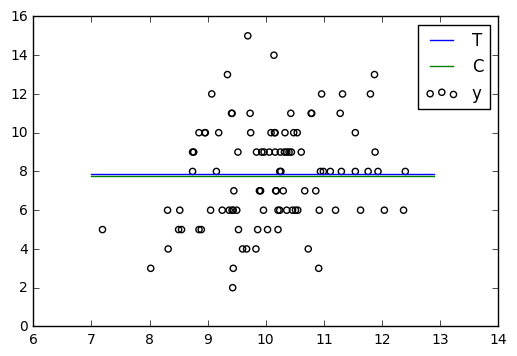

In [18]:
x = np.arange(7,13,0.1)
const = np.ones(x.shape[0])
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(x,np.exp(result.params[0]+result.params[1])*const,label='T')
plt.plot(x,np.exp(result.params[0])*const,label='C')
plt.legend()

In [19]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Mon, 30 Jan 2017   Deviance:                       84.993
Time:                        23:37:26   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


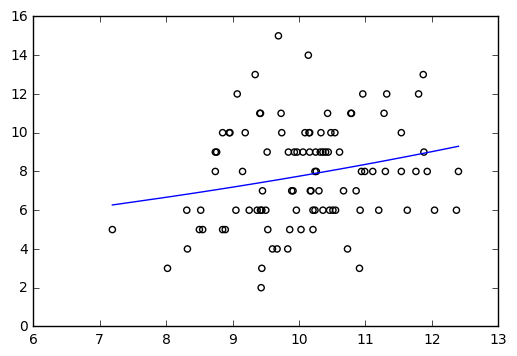

In [20]:
x_c = data.x_c.sort_index(by='x')
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(x_c['x'],result.predict(x_c))

In [24]:
data.x_c = sm.add_constant(data[['x','f_int']])
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Mon, 30 Jan 2017   Deviance:                       84.808
Time:                        23:41:48   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001         0.539     1.988
x              0.0801      0.037      2.162      0.031         0.007     0.153
f_int         -0.0320      0.074     -0.430      0.667        -0.178     0.114
==============================================================================
"""

In [27]:
llh_x = np.sum(stats.poisson.logpmf(data.y,np.exp(1.2917+0.0757*data.x)))
D_x = -2*llh_x

In [30]:
print (llh_x,D_x)

 (-235.38630388140064, 470.77260776280127)


In [34]:
llh_full = np.sum(stats.poisson.logpmf(data.y,data.y))
deviance = -2 * llh_full
print(llh_full,deviance)

(-192.88975252449595, 385.77950504899189)


In [35]:
residual_deviance = D_x - deviance
residual_deviance

84.993102713809378

In [36]:
llh = np.sum(stats.poisson.logpmf(data.y,data.y))
k = 100
deviance = -2*llh
residual_deviance = 0.0
aic = deviance + 2*k
summary = [['full',k,llh,deviance,residual_deviance,aic]]

In [38]:
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
result = model.fit()
summary.append(['const',result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [43]:
import itertools
columns = ['x','f_int']
for i in range(2):
    for a in itertools.combinations(columns,i+1):
        data.x_c = sm.add_constant(data[list(a)])
        model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
        result = model.fit()
        summary.append([list(a),result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [44]:
result_tabel = pd.DataFrame(summary,columns=['model','k','logL','deviance','residual_deviance','AIC'])

In [45]:
result_tabel

,model,k,logL,deviance,residual_deviance,AIC
0,full,100,-192.889753,385.779505,0.000000,585.779505
1,const,1,-237.643221,475.286443,89.506938,477.286443
2,[x],2,-235.386251,470.772502,84.992996,474.772502
3,[f_int],2,-237.627257,475.254514,89.475009,479.254514
4,"[x, f_int]",3,-235.293719,470.587438,84.807933,476.587438


In [47]:
np.random.seed(2)
y = np.random.poisson(8,50)
x = np.random.uniform(-2,2,50)
const = np.ones(50)

In [48]:
model = sm.GLM(y,np.array([x,const]).T,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -123.68
Date:                Tue, 31 Jan 2017   Deviance:                       54.666
Time:                        00:17:38   Pearson chi2:                     54.4
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0417      0.046     -0.913      0.361        -0.131     0.048
const          2.0754      0.051     40.708      0.000         1.975     2.175
==============================================================================
"""

In [50]:
result.aic

251.36653598406366

In [51]:
model = sm.GLM(y,const,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -124.10
Date:                Tue, 31 Jan 2017   Deviance:                       55.497
Time:                        00:18:32   Pearson chi2:                     54.7
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0669      0.050     41.078      0.000         1.968     2.165
==============================================================================
"""

In [52]:
result.aic

250.197522947187

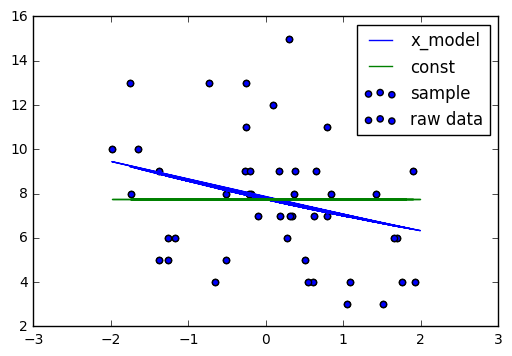

In [54]:
plt.scatter(x,y,label='sample')
plt.scatter(x,y,label='raw data')
plt.plot(x,np.exp(-0.1006*x+2.0454),label='x_model')
plt.plot(x,np.exp(2.049)*np.ones(x.shape[0]),label='const')
plt.legend()

In [60]:
x = np.arange(1.8,2.2,0.01)
llh = np.array([np.sum(stats.poisson.logpmf(y,np.exp(i))) for i in x])

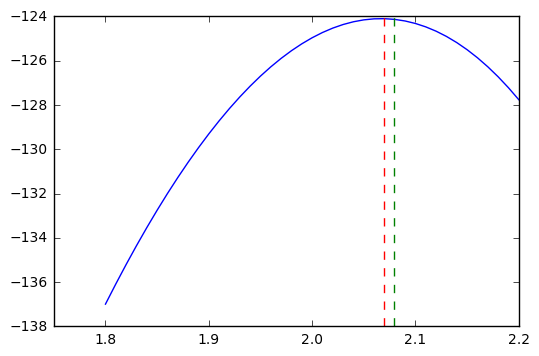

In [61]:
plt.plot(x,llh)
plt.axvline(x[np.argmax(llh)],ls='--',c='r')
plt.axvline(np.log(8),ls='--',c='g')

In [62]:
test_data = np.random.poisson(8,[200,50])

In [63]:
llh_test = np.array([np.sum(stats.poisson.logpmf(test,np.exp(2.0669))) for test in test_data])

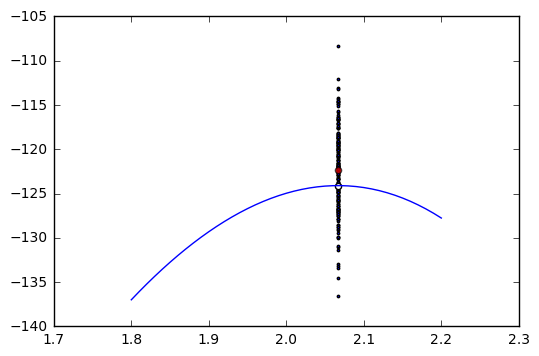

In [64]:
plt.plot(x,llh)
plt.scatter(np.ones(test_data.shape[0])*2.0669,llh_test,s=3,label='test')
plt.scatter(2.0669,llh_test.mean(),c='r',alpha=0.7,label='mean llh')
plt.scatter(2.0669,-124.1,c='w',label='estimated llf')

In [66]:
np.random.seed(2)
y = np.random.poisson(8,[12,50])

test = np.random.poisson(8,[12,200,50])

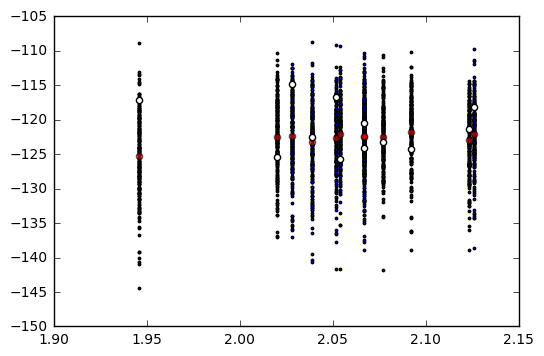

In [79]:
llh = []
params = []
llh_mean = []
llh_test = []

for i in range(12):
    model = sm.GLM(y[i],const,family=sm.families.Poisson())
    result = model.fit()
    llh.append(result.llf)
    params.append(result.params[0])
    
    llh_test = np.array([np.sum(stats.poisson.logpmf(tes,np.exp(result.params[0]))) for tes in test[i]])
    llh_mean.append(np.mean(llh_test))
    
    plt.scatter(np.ones(llh_test.shape[0])*result.params[0],llh_test,s=3)

plt.scatter(params,llh_mean,c='r',alpha=0.6)
plt.scatter(params,llh,c='w')

In [80]:
np.random.seed(2)
y = np.random.poisson(8,[100,50])
const = np.ones(50)

test = np.random.poisson(8,[100,200,50])

In [81]:
llh_ob = []
llh_mean = []
llh_diff = []

for i in range(100):
    model = sm.GLM(y[i],const,family=sm.families.Poisson())
    result = model.fit()
    llh_ob.append(result.llf)
    
    sample = np.array([np.sum(stats.poisson.logpmf(y_tes,np.exp(result.params[0]))) for y_tes in test[i]])
    llh_mean.append(np.mean(sample))
    
    llh_diff.append(result.llf - sample.mean())
    

1.04200796029


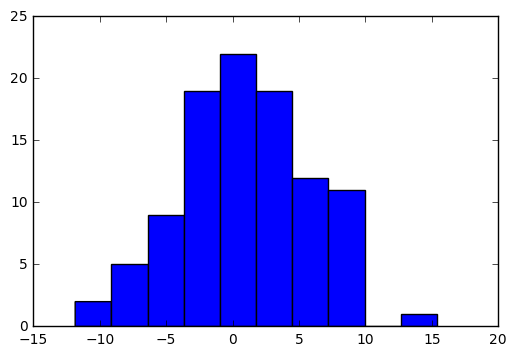

In [85]:
plt.hist(llh_diff)
print np.mean(llh_diff)